In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import h5py
import torch

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
np.set_printoptions(precision=2, suppress=False)

cuda:0


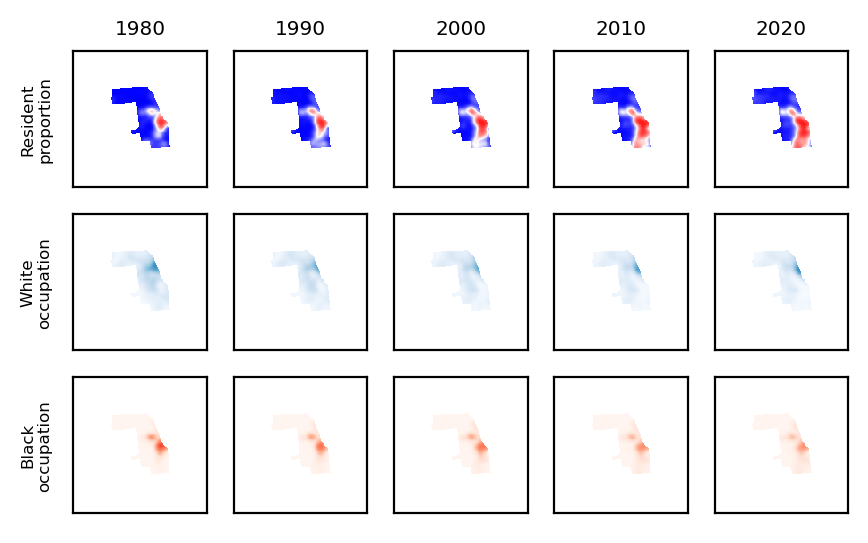

In [5]:
from census_dataset import CensusDataset

plt.rcParams['font.size'] = 6

dataset = CensusDataset('Illinois_Cook', sigma=3)
dataset.validate()

# Look at the time series used for dynamics training

fig, ax = plt.subplots(3, 5, figsize=(5, 3), dpi=200)

for i in range(5):
    wb0 = dataset.wb(1980+i*10)
    ax[0,i].set_title(1980+i*10)
    ax[0,i].pcolormesh(dataset.x, dataset.y, (wb0[0]-wb0[1]) / np.sum(wb0, axis=0), vmin=-1, vmax=1, cmap='bwr_r', alpha=dataset.mask)
    ax[1,i].pcolormesh(dataset.x, dataset.y, wb0[0], vmin=0, vmax=1, cmap='Blues', alpha=dataset.mask)
    ax[2,i].pcolormesh(dataset.x, dataset.y, wb0[1], vmin=0, vmax=1, cmap='Reds', alpha=dataset.mask)
    
ax[0,0].set_ylabel('Resident\nproportion')
ax[1,0].set_ylabel('White\noccupation')
ax[2,0].set_ylabel('Black\noccupation')

for a in ax.flatten():
    a.set(xticks=[], yticks=[])

Text(0, 0.5, '2020 Census')

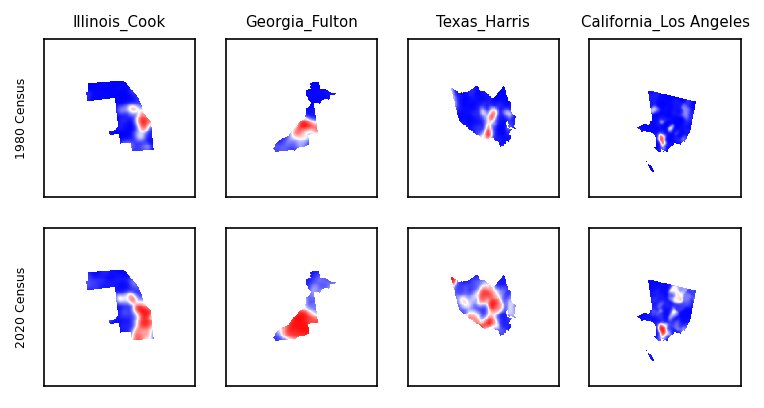

In [3]:
from census_dataset import CensusDataset
from torch.utils.data import ConcatDataset

# Plot the datasets shown in Figure 3

plt.rcParams['font.size'] = 6

fig3_county = [
    'Illinois_Cook',
    'Georgia_Fulton',
    'Texas_Harris',
    'California_Los Angeles'
]
fig, ax = plt.subplots(2, 4, dpi=150, sharex='col', sharey='col', figsize=(6,3))
for i, county in enumerate(fig3_county):
    ds = CensusDataset(county).validate()
    wb = ds[0]['wb']
    ax[0,i].pcolormesh(ds.x, ds.y, (wb[0,0]-wb[0,1])/wb[0].sum(0), cmap='bwr_r', vmin=-1, vmax=1, alpha=ds.mask)
    ax[1,i].pcolormesh(ds.x, ds.y, (wb[-1,0]-wb[-1,1])/wb[-1].sum(0), cmap='bwr_r', vmin=-1, vmax=1, alpha=ds.mask)
    ax[0,i].set_title(county)

for a in ax.flatten():
    a.set(xticks=[], yticks=[])
    
ax[0,0].set_ylabel(f'1980 Census')
ax[1,0].set_ylabel(f'2020 Census')

Text(0.5, 0, 'Fill fraction')

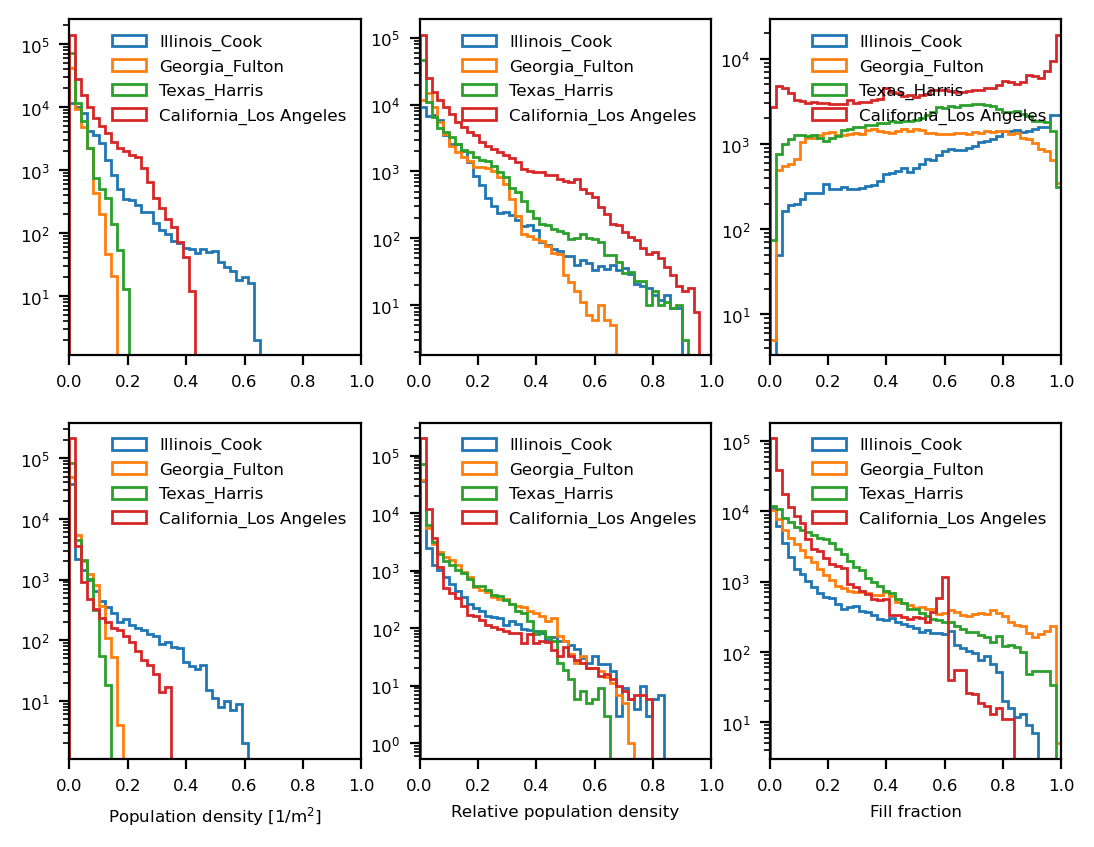

In [13]:
# Plot a histogram of dataset population densities
def plot_histogram(ax, ds):
    wb = ds.wb(years)
    ax[0].hist(wb[:, 0].flatten(), histtype='step', label=county, bins=bins, alpha=1.)
    ax[1].hist(wb[:, 1].flatten(), histtype='step', label=county, bins=bins, alpha=1.)

fig, ax = plt.subplots(2, 3, dpi=200)
bins = np.linspace(0, 1, 50)
years = [1980, 1990, 2000, 2010, 2020]
data_w = []
data_b = []
for i, county in enumerate(fig3_county):
    ds = CensusDataset(county).validate()
    plot_histogram(ax[:,0], ds)

    ds = CensusDataset(county, use_max_scaling=True).validate()
    plot_histogram(ax[:,1], ds)

    ds = CensusDataset(county, use_fill_frac=True).validate()
    plot_histogram(ax[:,2], ds)

for a in ax.flatten():
    a.legend(framealpha=0)
    a.set_xlim([0, 1])
    a.set_yscale('log')

ax[1,0].set_xlabel('Population density [$1/$m$^2$]')
ax[1,1].set_xlabel('Relative population density')
ax[1,2].set_xlabel('Fill fraction')

Text(0.5, 0, 'Fill fraction')

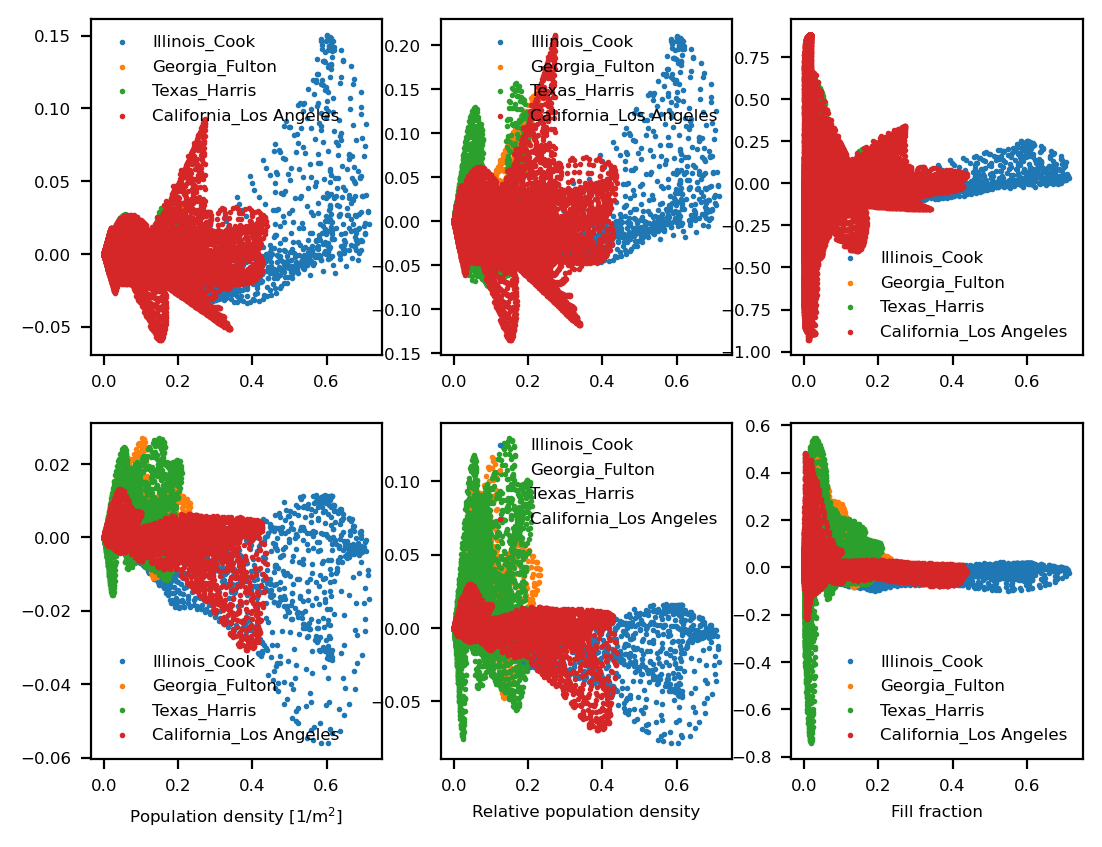

In [14]:
# Plot a histogram of dataset population densities
def plot_histogram(ax, dataset):
    wb = dataset.wb(years)
    dt_wb = wb[1:] - wb[:-1]
    housing = dataset.housing.flatten()
    ax[0].scatter(housing, dt_wb[:, 0].flatten(), s=1, label=dataset.county)
    ax[1].scatter(housing, dt_wb[:, 1].flatten(), s=1, label=dataset.county)

fig, ax = plt.subplots(2, 3, dpi=200)
years = [2010, 2020]
for i, county in enumerate(fig3_county):
    ds = CensusDataset(county).validate()
    plot_histogram(ax[:,0], ds)

    ds = CensusDataset(county, use_max_scaling=True).validate()
    plot_histogram(ax[:,1], ds)

    ds = CensusDataset(county, use_fill_frac=True).validate()
    plot_histogram(ax[:,2], ds)

for a in ax.flatten():
    a.legend(framealpha=0)

ax[1,0].set_xlabel('Population density [$1/$m$^2$]')
ax[1,1].set_xlabel('Relative population density')
ax[1,2].set_xlabel('Fill fraction')

Text(0.5, 0, 'Fill fraction')

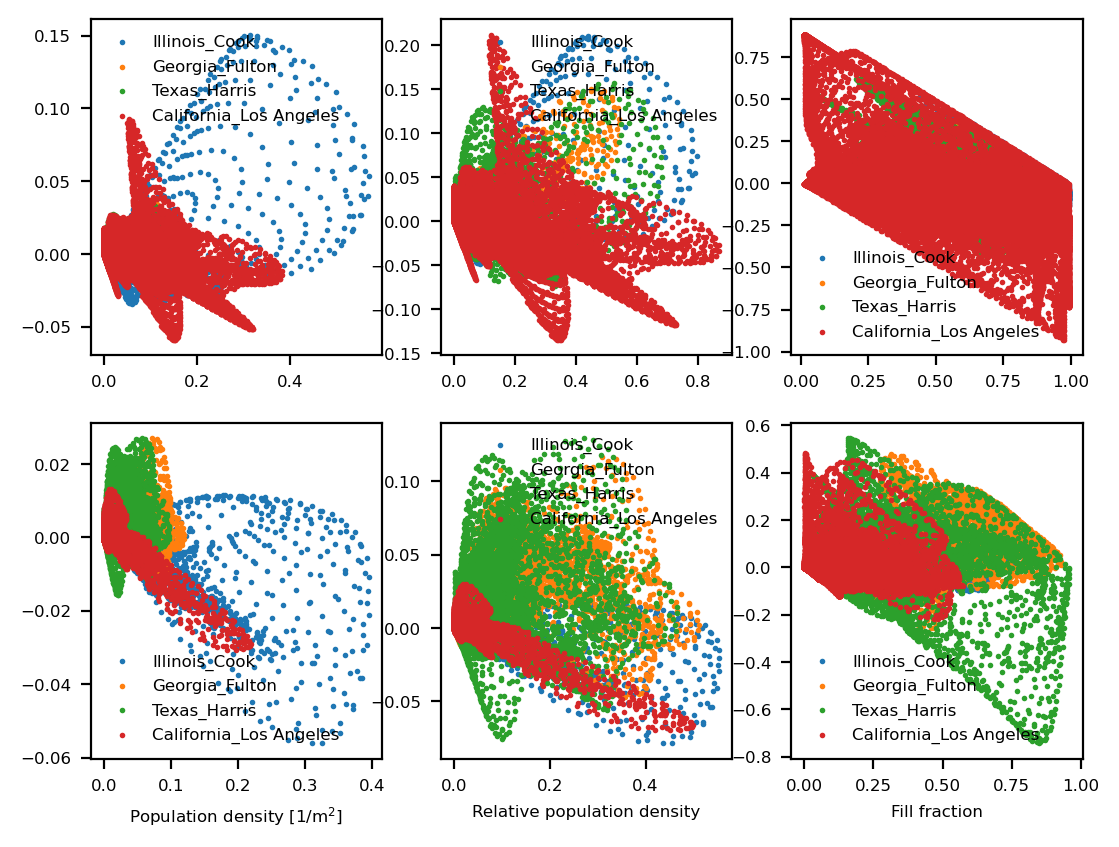

In [15]:
# Plot a histogram of dataset population densities
def plot_histogram(ax, dataset):
    wb = dataset.wb(years)
    dt_wb = wb[1:] - wb[:-1]
    housing = dataset.housing.flatten()
    ax[0].scatter(wb[0,0].flatten(), dt_wb[:, 0].flatten(), s=1, label=dataset.county)
    ax[1].scatter(wb[0,1].flatten(), dt_wb[:, 1].flatten(), s=1, label=dataset.county)

fig, ax = plt.subplots(2, 3, dpi=200)
years = [2010, 2020]
for i, county in enumerate(fig3_county):
    ds = CensusDataset(county).validate()
    plot_histogram(ax[:,0], ds)

    ds = CensusDataset(county, use_max_scaling=True).validate()
    plot_histogram(ax[:,1], ds)

    ds = CensusDataset(county, use_fill_frac=True).validate()
    plot_histogram(ax[:,2], ds)

for a in ax.flatten():
    a.legend(framealpha=0)

ax[1,0].set_xlabel('Population density [$1/$m$^2$]')
ax[1,1].set_xlabel('Relative population density')
ax[1,2].set_xlabel('Fill fraction')